In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [14]:
df=pd.read_csv("data_jobs.csv")

In [15]:
df_US=df[df['job_country']=="United States"].copy()

# Data Cleaning

In [16]:
df_US.drop_duplicates(inplace=True)
df_US.dropna(how='all',inplace=True)
df_US['job_posted_date']=pd.to_datetime(df_US['job_posted_date'])
df_US['job_skills']=df_US['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)
df_US['job_type_skills']=df_US['job_type_skills'].apply(lambda type_skills : ast.literal_eval(type_skills) if pd.notna(type_skills) else type_skills)

In [17]:
df_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,NaN,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,NaN,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,NaN,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,NaN,NaN,NaN,JPMorgan Chase & Co.,NaN,NaN
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,NaN,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,NaN,NaN,NaN,Axelon Services Corporation,NaN,NaN


In [18]:
# Calculate the frequancies for the top 10 job titles
job_title_postitng_count=df_US['job_title_short'].value_counts().reset_index(name='job_total')
job_title_postitng_count

,job_title_short,job_total
0,Data Analyst,67814
1,Data Scientist,58828
2,Data Engineer,35080
3,Senior Data Scientist,12945
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [19]:
# Explode job_skills so that each skill appears in a separate row (one-to-many)
skills_exploded = df_US.explode(['job_skills'])

In [20]:
# Group by job_skills and job_title_short --> size
# Reset index and sort values in decsending order by skills_count
job_skills_count = skills_exploded.groupby(['job_skills','job_title_short']).size()
job_skills_count = job_skills_count.reset_index(name='skills_count')
job_skills_count = job_skills_count.sort_values(by='skills_count',ascending=False)
job_skills_count

,job_skills,job_title_short,skills_count
1209,python,Data Scientist,42378
1521,sql,Data Analyst,34451
1523,sql,Data Scientist,30033
455,excel,Data Analyst,27518
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [21]:
# merge the tow dfs on job_title_short
# Calculate per for each skill
job_skills_per=pd.merge(job_skills_count,job_title_postitng_count,on='job_title_short',how='left')
job_skills_per['skill_per']=(job_skills_per['skills_count'] / job_skills_per['job_total']) * 100

job_skills_per

,job_skills,job_title_short,skills_count,job_total,skill_per
0,python,Data Scientist,42378,58828,72.037125
1,sql,Data Analyst,34451,67814,50.802194
2,sql,Data Scientist,30033,58828,51.052220
3,excel,Data Analyst,27518,67814,40.578642
4,r,Data Scientist,26022,58828,44.234038
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


In [22]:
# Select the top 3 job_titles_short
# Convert them to list
job_titles = job_skills_per['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

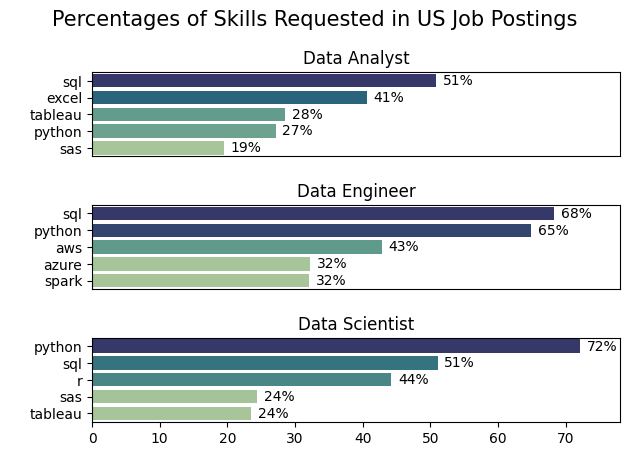

In [24]:
# Visualize the top 5 skills for the 3 job titles
fig ,ax=plt.subplots(3,1)

pallete = sns.color_palette("crest", as_cmap=True)
for i , job_title in enumerate(job_titles):
    data_plot=job_skills_per[job_skills_per['job_title_short']==job_title].head(5)
    sns.barplot(data=data_plot,x='skill_per',y='job_skills',hue='skills_count',ax=ax[i],palette=pallete)
    ax[i].set_title(job_title)
    ax[i].set_xlabel(" ")
    ax[i].set_ylabel(" ")
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,78)

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    for n, v in enumerate(data_plot['skill_per']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')
  
fig.suptitle('Percentages of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) 
plt.show()